In [ ]:
# THE CONSUMER PRICE INDEX (CPI) IS A MEASURE OF THE AVERAGE CHANGE OVER TIME IN THE PRICES PAID BY URBAN CONSUMERS FOR A MARKET BASKET OF CONSUMER GOODS AND SERVICES.
# IN THIS CPI SERIES INDEX WE ARE LOOKING AT PERSCRIPTION DRUG PRICES OVER THE PAST 10 YEAR PERIOD - INCREASE CPI = INFLATION = RISING COST OF LIVING
# THIS PYTHON SCRIPT IS FOCUSED ON TIME SERIES TECHNIQUES OUTSIDE OF THE ARIMA MODELS

In [ ]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib as mpl
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

In [ ]:
# #1 THIS IS ONE WAY OF LOADING IN THE API DATA FROM BLS AND MOST SIMPLE
BLS_API_URL = "https://api.bls.gov/publicAPI/v2/timeseries/data/"
SERIES_ID = "CUUR0000SEMF01"
START_YEAR = 2015
END_YEAR = 2025

In [ ]:
# #2 BELOW IS AN ADDITIONAL WAY OF CONNECTING TO THE API
# headers = {'Content-type': 'application/json'}
# data = json.dumps({"seriesid": ['CU'UR0000SEMF01],"startyear":"2005", "endyear":"2025"})
# p = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', data=data, headers=headers)
# json_data = json.loads(p.text)

In [ ]:
# #2 CHECK API CONNECTION AND ITS STATUS IN JSON FORMAT
# status = json_data['status']

In [ ]:
# #2 PRINT THE STATUS RESULTS TO CONFIRM CONNECTION
# print(status)

REQUEST_SUCCEEDED


In [ ]:
payload = {
    "seriesid": [SERIES_ID],
    "startyear": str(START_YEAR),
    "endyear": str(END_YEAR)
}

In [ ]:
response = requests.post(BLS_API_URL, json=payload)
data = response.json()

In [ ]:
if "Results" not in data:
    print("Error fetching data:", data)
    exit()

In [ ]:
cpi_data = []
for series in data["Results"]["series"]:
    for item in series["data"]:
        year = item["year"]
        month = item["periodName"]
        value = float(item["value"])
        cpi_data.append({"Year": year, "Month": month, "CPI": value})

In [ ]:
df = pd.DataFrame(cpi_data)
df["Date"] = pd.to_datetime(df["Month"] + " " + df["Year"])
df = df.sort_values(by="Date")

<ipython-input-8-6ed25fe3cbbe>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Month"] + " " + df["Year"])


In [ ]:
# LET'S TAKE A LOOK AT THE SAVE DATAFRAME OF CPI DATA TABLE
df.head()

,Year,Month,CPI,Date
119,2015,January,471.754,2015-01-01
118,2015,February,476.638,2015-02-01
117,2015,March,478.076,2015-03-01
116,2015,April,478.206,2015-04-01
115,2015,May,478.566,2015-05-01


<ipython-input-10-049a554b621c>:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


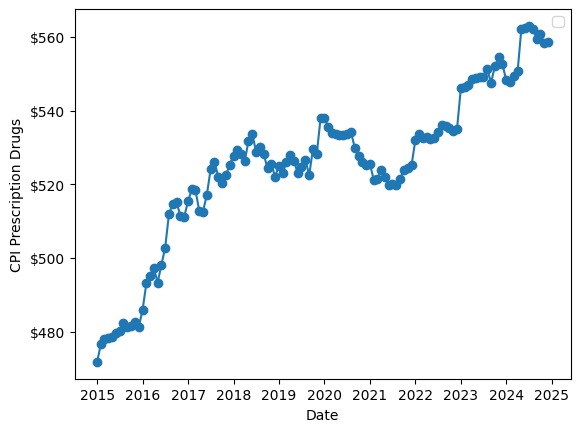

In [ ]:
# THIS IS A BASIC AND SIMPLE MATPLOTLIB PLOT
plt.plot(df['Date'], df['CPI'], marker='o', linestyle='-')
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'${int(x):,}'))
plt.xlabel('Date')
plt.ylabel('CPI Prescription Drugs')
plt.title('')
plt.legend()
plt.show()

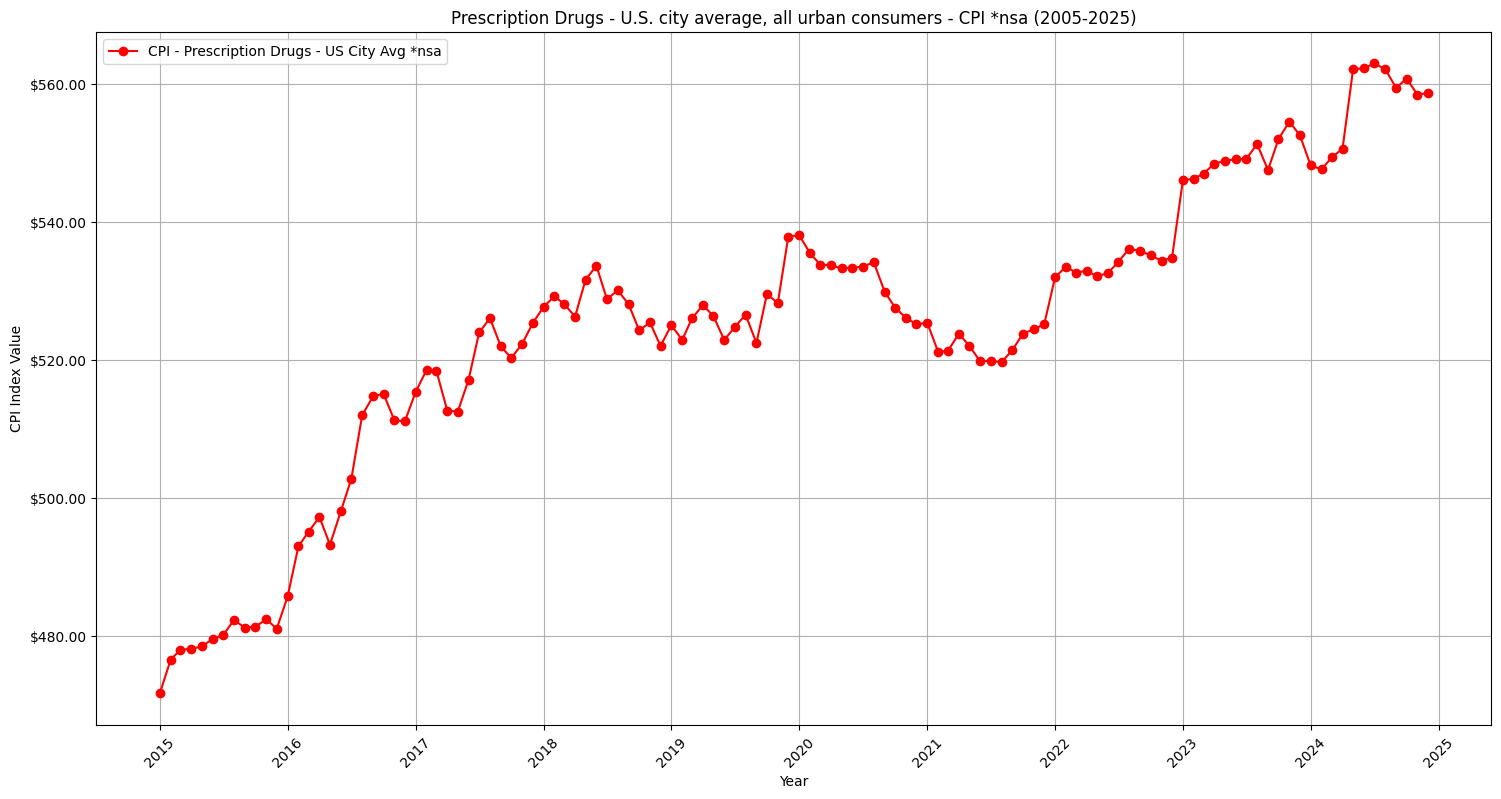

In [ ]:
# THIS IS ANOTHER WAY OF LOOKING AT IT IN A HISTORICAL LINE CHART BY YEAR MONTH
plt.figure(figsize=(18, 9))
plt.plot(df["Date"], df["CPI"], marker="o", linestyle="-", color="r", label="CPI - Prescription Drugs - US City Avg *nsa")
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'${x:,.2f}'))
plt.xlabel("Year")
plt.ylabel("CPI Index Value")
plt.title("Prescription Drugs - U.S. city average, all urban consumers - CPI *nsa (2005-2025)")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [ ]:
# THIS IS A QUICK VISUAL CROSS VALIDATION OF THE DATA DIRECTLY FROM WEBSITE
# Year	Jan	Feb	Mar	Apr	May	Jun	Jul	Aug	Sep	Oct	Nov	Dec	HALF1	HALF2
# 2020	538.154	535.548	533.885	533.767	533.325	533.460	533.551	534.254	529.966	527.649	526.167	525.244	534.690	529.472

In [ ]:
# LET'S TAKE A LOOK AT THE TREND & SEASONALITY WTIH A PLOT
x = df['Date'].values
y1 = df['CPI'].values

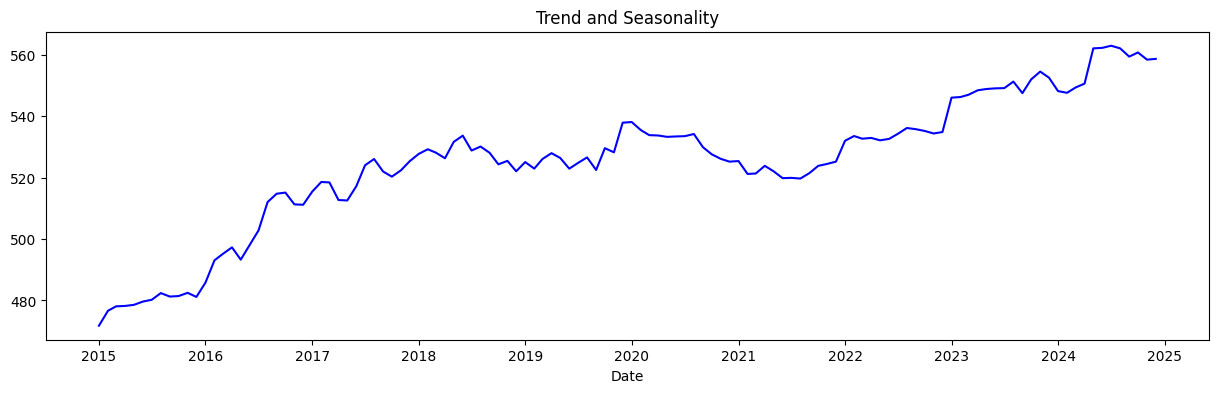

In [ ]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()


plot_df(df, x=df['Date'], y=df['CPI'], title='Trend and Seasonality')

In [ ]:
# THE DIFFERENT BETWEEN MULTIPLICATIVE VS. ADDITIVE DECOMPOSITION
# MULTIPLICATIVE DECOMPOSITION OFTEN USED WHEN SEASONAL VARIATION INCREASES WITH THE TREND. THIS MULTIPLIES THE COMPONENTS - Y(t)=T(t)×S(t)×R(t)
# ADDITIVE DECOMPOSITION ADDS THE COMPONENTS Y(t)=T(t)+S(t)+R(t) & USED WHEN SEASONAL FLUCTUATION ARE CONSTANT OVER TIME
# EVEN THOUGH IT LOOKS LIKE PRECRIPTION DRUG INFLATION IS FAIRLY CONSTANT OVER TIME AND WE SEE VERY LITTLE SEASONALITY, IT DOES HAVE AN EXPONENTIAL ASPECT SO WE WILL LOOK AT MULTIPLICATIVE FIRST
multiplicative_decomposition = seasonal_decompose(df['CPI'], model='multiplicative', period=30)

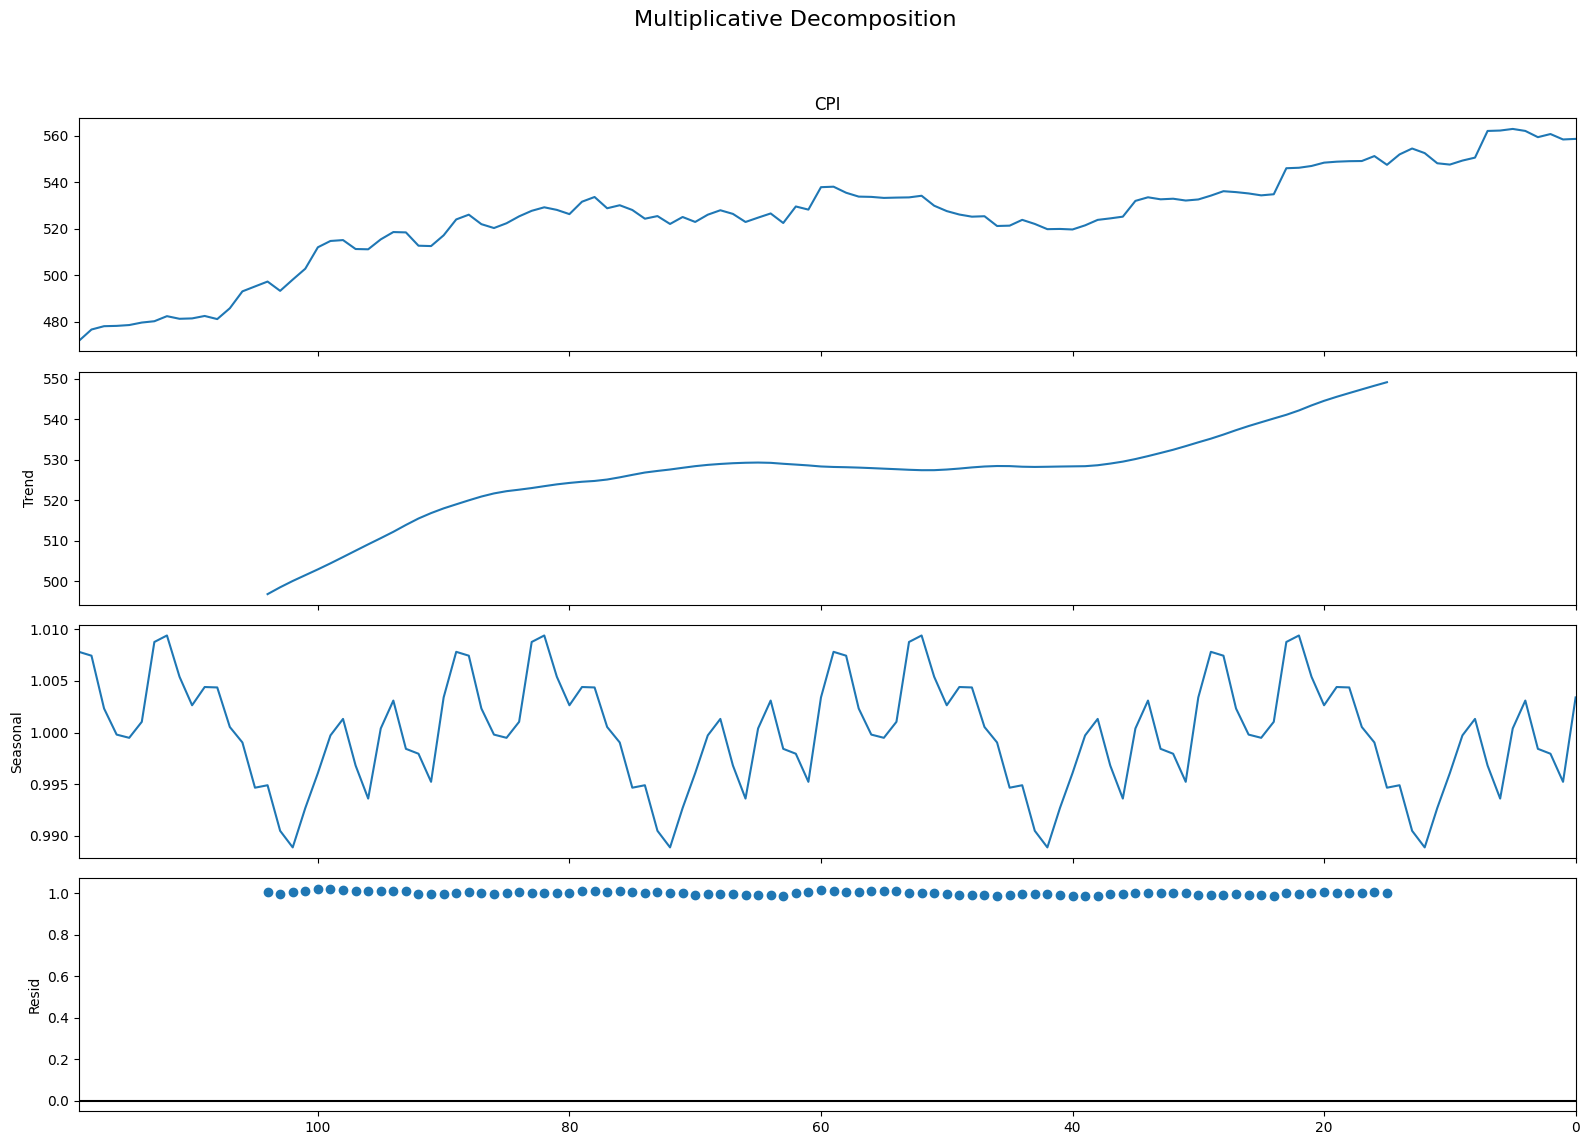

In [ ]:
# LOOKING AT IT WE DO NOT HAVE A VERY STRONG SEASONAL PATTERN AS IT IS BETWEEN 1.01 AND 0.990
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

In [ ]:
# Additive Decomposition
additive_decomposition = seasonal_decompose(df['CPI'], model='additive', period=30)

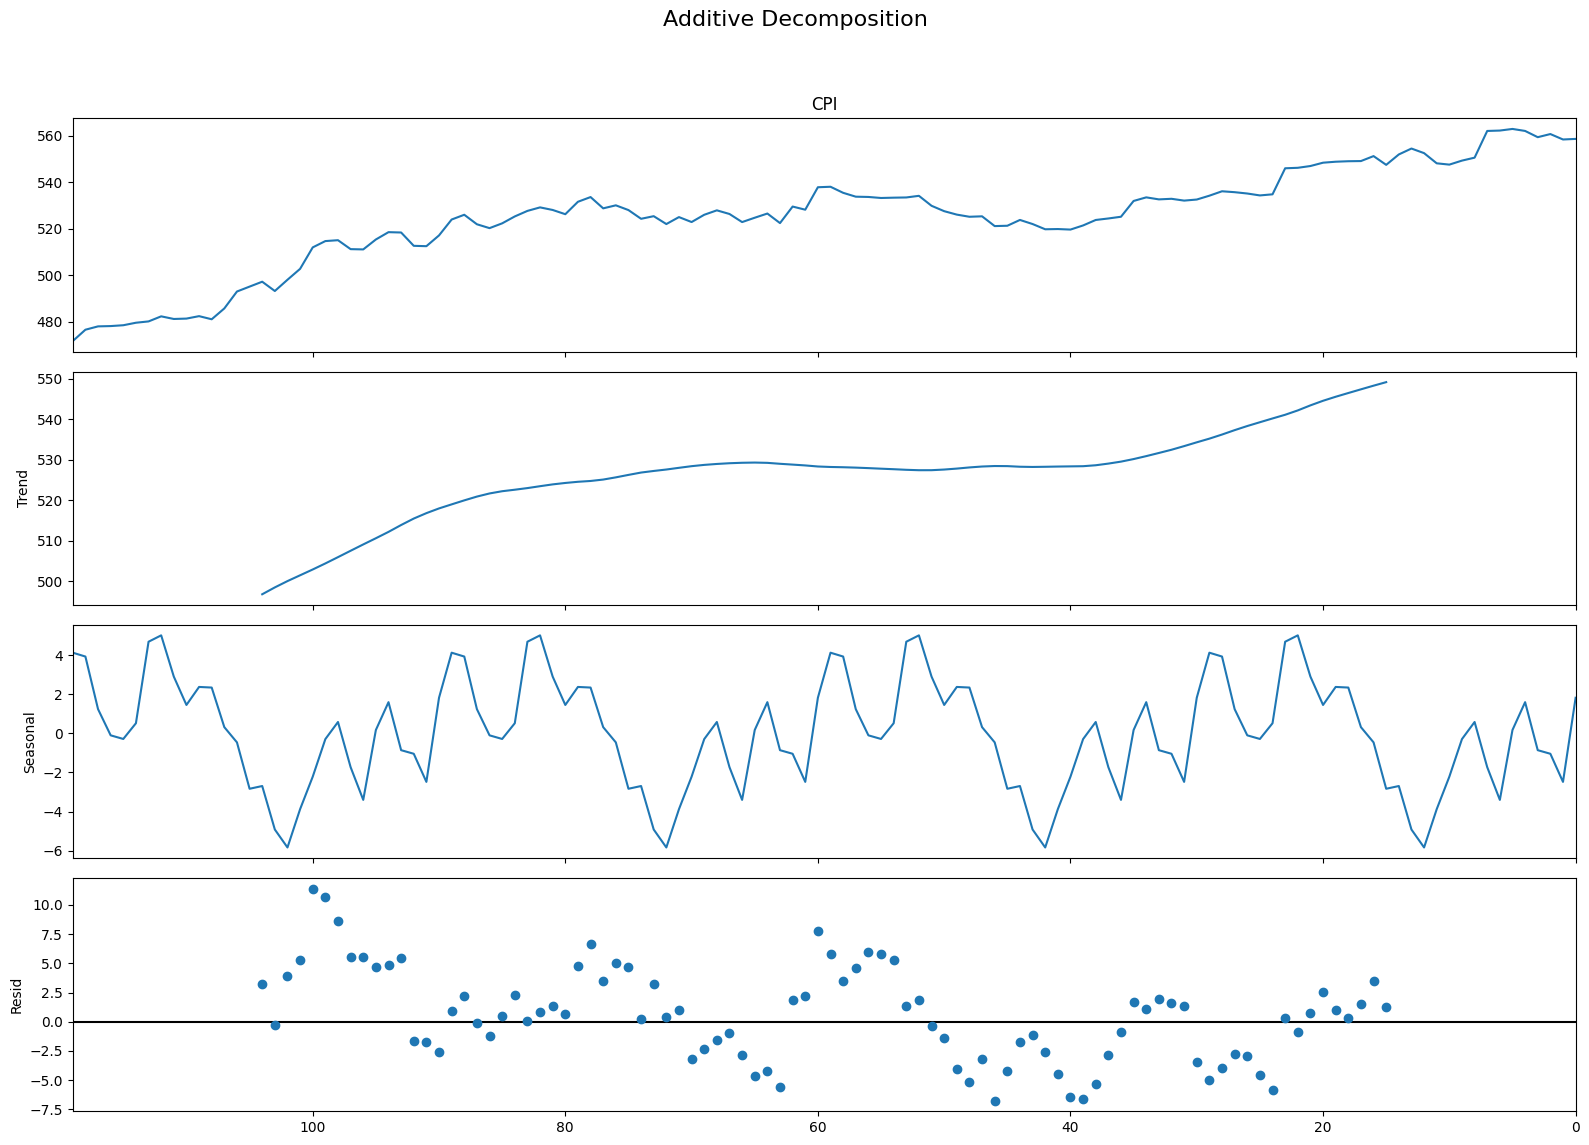

In [ ]:
# LOOKING AT IT WE HAVE A MUCH STRONGER SEASONAL WHICH LOOKS MORE CYCLIC OVER YEARS THAN A STANDARD ANNUAL SEASONAL TREND BY MONTHS. THE RESIDUALS OF THIS LOOK VERY RANDOM WHICH IS ALSO GOOD.
plt.rcParams.update({'figure.figsize': (16,12)})
additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()